Enter your monthly salary ($):  1000000
Enter your current savings ($):  1800
Enter your monthly rent ($):  6237
Enter your investment in flats ($):  20000
Enter your investment in mutual funds ($):  5900
Enter the cost of the item you want to buy ($):  20000
Enter the EMI percentage for the purchase (%):  18
Enter the EMI duration (months):  12


                   Financial Summary                   
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                               ┃ Amount ($) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Monthly Salary                         │ 1000000.00 │
│ Savings after Purchase                 │    1800.00 │
│ Rent                                   │    6237.00 │
│ Flats Investment                       │   20000.00 │
│ Mutual Funds Investment                │    5900.00 │
│ Purchase Cost                          │   20000.00 │
│ Monthly EMI (for 12 months)            │    5266.67 │
│ Predicted Remaining Salary             │    5573.00 │
│ EMI Breakdown:                         │            │
│ → Monthly Principal                    │    1666.67 │
│ → Monthly Interest                     │    3600.00 │
│ → Total Interest Paid                  │   43200.00 │
│ → Total Payment (Principal + Interest) │   63200.00 │
│ Total Interest Percentage              │    216.00% │
└────────────────────────────────────────┴────────────┘

💡 AI-Powered Financial Suggestions:

⚠️ Your savings are only 0.18% of your salary. Try to increase your savings to at least 20% of your monthly income.

💪 Your EMI is 0.53%. Well within the safe range!

⚠️ Your total investments are 2.59% of your salary. Increase your investments to at least 30% for long-term growth.

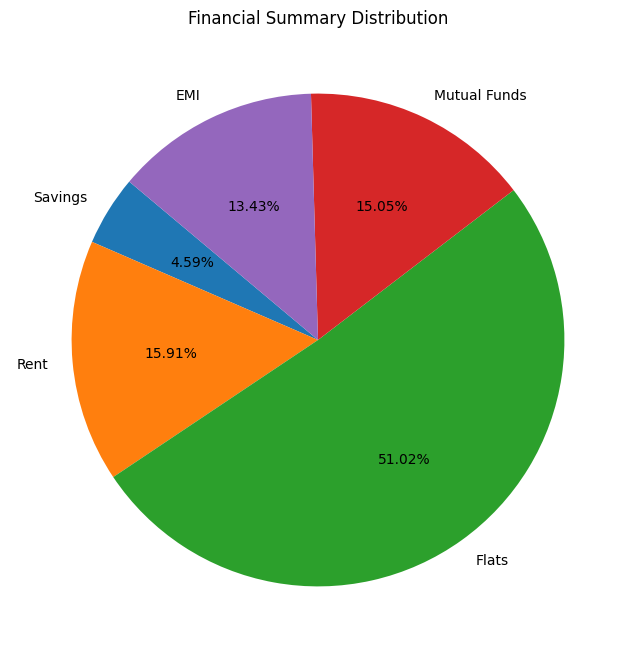

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rich.console import Console
from rich.table import Table
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Initialize console for graphical output
console = Console()

# === Sample Dataset for AI Model (Replace with real historical data if available) ===
data = {
    "Salary": [5000, 7000, 8000, 6000, 10000, 12000, 15000],
    "Savings": [2000, 3000, 5000, 2500, 7000, 10000, 12000],
    "Rent": [1000, 1500, 2000, 1200, 2500, 3000, 3500],
    "Flats": [500, 1000, 1500, 700, 2000, 2500, 3000],
    "Mutual Funds": [700, 1200, 1800, 900, 2500, 3000, 4000],
    "Remaining Salary": [1800, 2800, 2700, 1900, 5000, 5500, 7000]  # Target variable
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Split data into features (X) and target (y)
X = df.drop(columns=["Remaining Salary"])
y = df["Remaining Salary"]

# Train AI model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === Take user input ===
salary = float(input("Enter your monthly salary ($): "))
savings = float(input("Enter your current savings ($): "))
rent = float(input("Enter your monthly rent ($): "))
flats = float(input("Enter your investment in flats ($): "))
mutual_funds = float(input("Enter your investment in mutual funds ($): "))
purchase = float(input("Enter the cost of the item you want to buy ($): "))
emi_percent = float(input("Enter the EMI percentage for the purchase (%): "))
emi_duration_months = int(input("Enter the EMI duration (months): "))

# Calculate post-purchase savings
new_savings = savings - purchase if purchase <= savings else savings

# Interest calculation
total_interest = (purchase * emi_percent / 100) * emi_duration_months
monthly_interest = total_interest / emi_duration_months

# EMI calculation
monthly_principal = purchase / emi_duration_months
emi_amount = monthly_principal + monthly_interest
total_payment = emi_amount * emi_duration_months
interest_percent = (total_interest / purchase) * 100

# Predict remaining salary after expenses using AI
input_data = pd.DataFrame([[salary, savings, rent, flats, mutual_funds]], 
                          columns=['Salary', 'Savings', 'Rent', 'Flats', 'Mutual Funds'])

predicted_remaining_salary = model.predict(input_data)[0]

# Create table for graphical output
table = Table(title="Financial Summary", show_header=True, header_style="bold magenta")
table.add_column("Category", style="cyan", justify="left")
table.add_column("Amount ($)", style="green", justify="right")

table.add_row("Monthly Salary", f"{salary:.2f}")
table.add_row("Savings after Purchase", f"{new_savings:.2f}")
table.add_row("Rent", f"{rent:.2f}")
table.add_row("Flats Investment", f"{flats:.2f}")
table.add_row("Mutual Funds Investment", f"{mutual_funds:.2f}")
table.add_row("Purchase Cost", f"{purchase:.2f}")
table.add_row(f"Monthly EMI (for {emi_duration_months} months)", f"{emi_amount:.2f}")
table.add_row("[bold yellow]Predicted Remaining Salary[/bold yellow]", f"[bold green]{predicted_remaining_salary:.2f}[/bold green]")

# Add EMI breakdown
table.add_row("[bold cyan]EMI Breakdown:[/bold cyan]", "")
table.add_row("→ Monthly Principal", f"{monthly_principal:.2f}")
table.add_row("→ Monthly Interest", f"{monthly_interest:.2f}")
table.add_row("→ Total Interest Paid", f"{total_interest:.2f}")
table.add_row("→ Total Payment (Principal + Interest)", f"{total_payment:.2f}")
table.add_row("[bold yellow]Total Interest Percentage[/bold yellow]", f"[bold green]{interest_percent:.2f}%[/bold green]")

# Display the table
console.print(table)

# === Dynamic AI-Based Suggestions ===
console.print("\n[bold yellow]💡 AI-Powered Financial Suggestions:[/bold yellow]")

# Savings suggestion
if new_savings < 0.2 * salary:
    console.print(f"[red]⚠️ Your savings are only {new_savings / salary:.2%} of your salary. Try to increase your savings to at least 20% of your monthly income.[/red]")
elif new_savings < 0.5 * salary:
    console.print(f"[yellow]✅ Your savings are at {new_savings / salary:.2%}. Consider saving around 30% for better financial security.[/yellow]")
else:
    console.print(f"[green]💪 Your savings are at {new_savings / salary:.2%}. Good job on maintaining healthy savings![/green]")

# EMI suggestion
if emi_amount > 0.3 * salary:
    console.print(f"[red]⚠️ Your EMI is {emi_amount / salary:.2%} of your salary, which is high. Consider reducing the EMI or extending the duration.[/red]")
elif emi_amount > 0.2 * salary:
    console.print(f"[yellow]✅ Your EMI is {emi_amount / salary:.2%}. Manageable but close to the limit. Keep an eye on other expenses.[/yellow]")
else:
    console.print(f"[green]💪 Your EMI is {emi_amount / salary:.2%}. Well within the safe range![/green]")

# Investment suggestion
total_investments = flats + mutual_funds
if total_investments < 0.3 * salary:
    console.print(f"[red]⚠️ Your total investments are {total_investments / salary:.2%} of your salary. Increase your investments to at least 30% for long-term growth.[/red]")
elif total_investments < 0.5 * salary:
    console.print(f"[yellow]✅ Your investments are at {total_investments / salary:.2%}. Try increasing high-return investments.[/yellow]")
else:
    console.print(f"[green]💪 Your investments are at {total_investments / salary:.2%}. Solid financial positioning![/green]")

# === Pie Chart for Financial Summary ===
labels = ['Savings', 'Rent', 'Flats', 'Mutual Funds', 'EMI']
values = [new_savings, rent, flats, mutual_funds, emi_amount]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%.2f%%', colors=plt.cm.tab10.colors, startangle=140)
plt.title('Financial Summary Distribution')
plt.show()
